In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
path = "Results/electricity_train/electricity_ip_100_op_50_test_01/electricity/"
preds = np.load(path+'trans-mse-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
#preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
#trues = trues.reshape(-1, preds.shape[-2], preds.shape[-1])
# [samples, pred_len, dimensions]
print(preds.shape, trues.shape, inputs.shape)

print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

(188, 50, 1) (188, 50, 1) (188, 100, 1)
mse :  10159.988 mae:  62.469086


In [34]:
# x = preds.reshape(54,13,-1,1)
# preds = x.mean(axis=1)
# preds.shape
# x = trues.reshape(54,13,-1,1)
# trues = x.mean(axis=1)
# trues.shape

# print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

<ipython-input-21-f4b3709aaf9c>:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



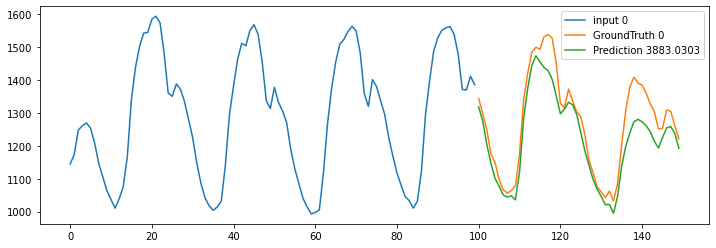

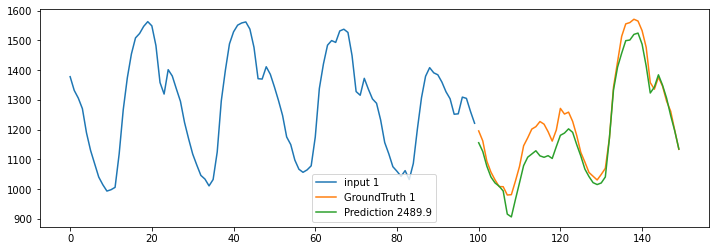

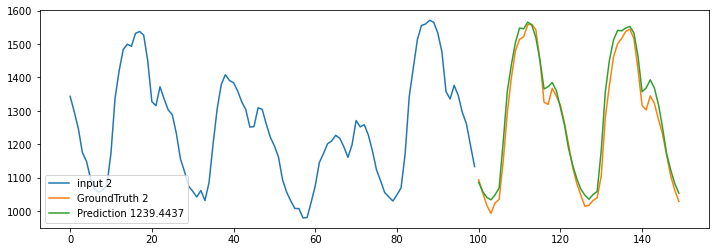

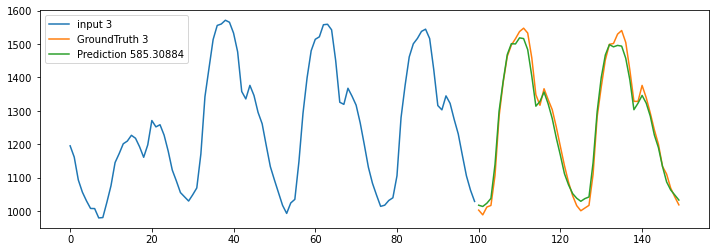

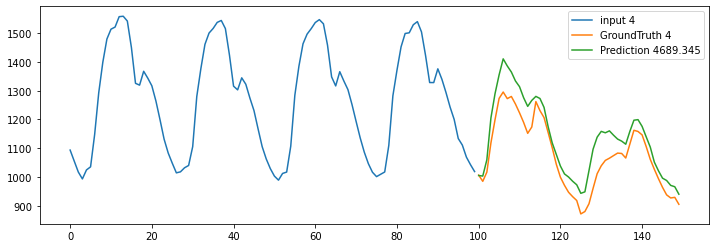

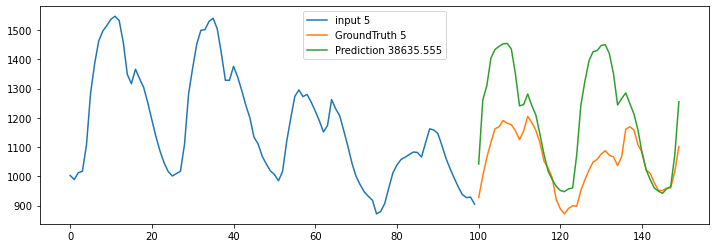

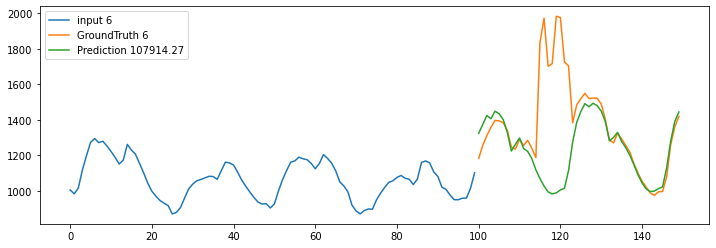

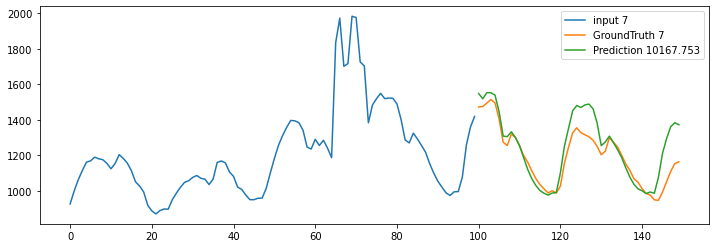

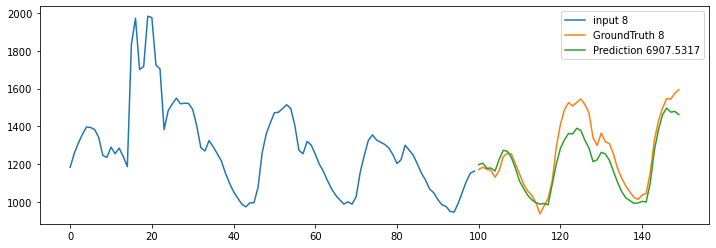

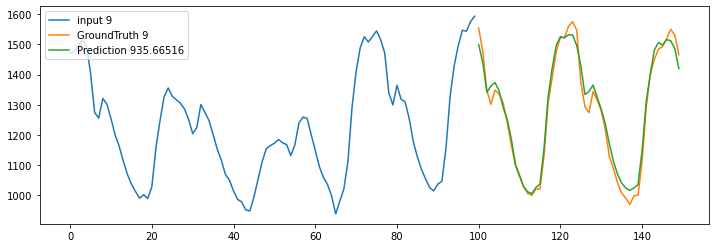

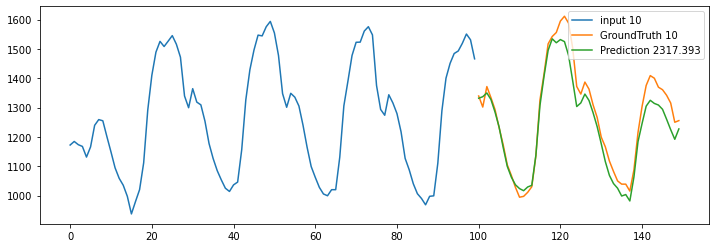

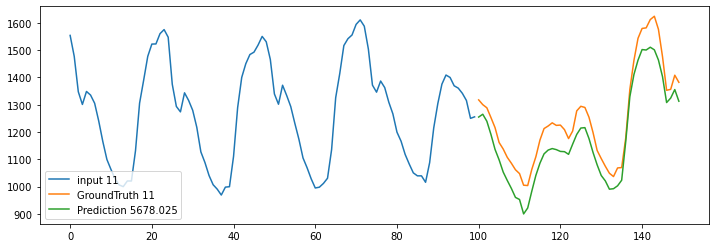

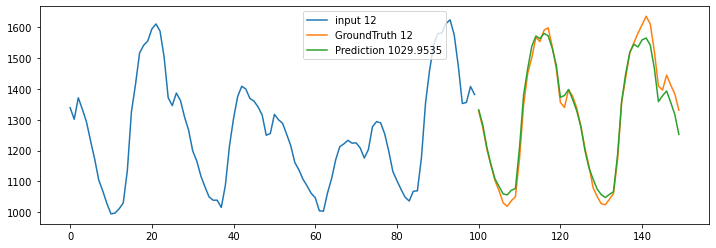

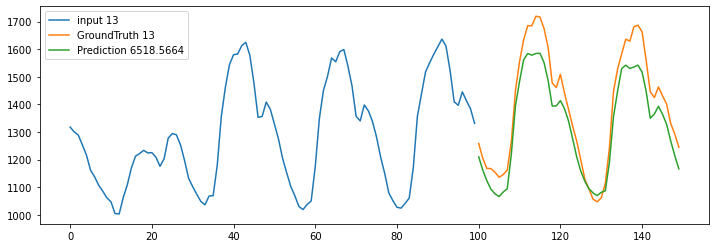

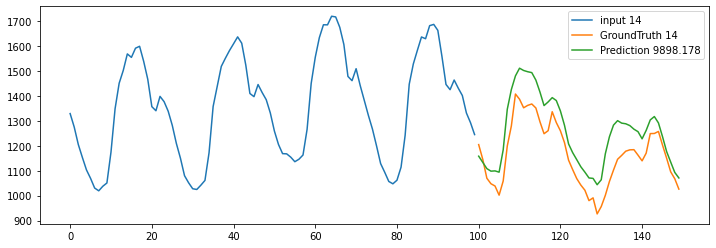

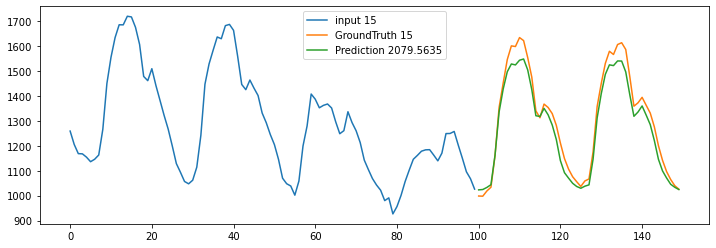

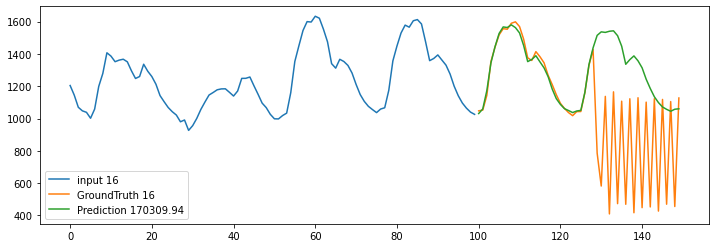

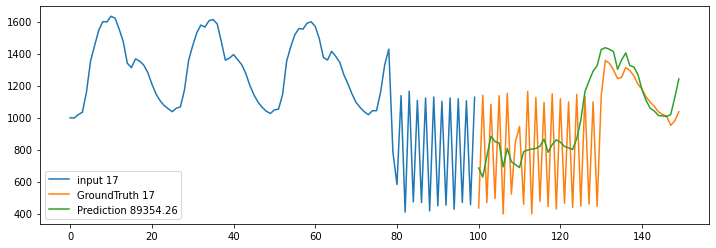

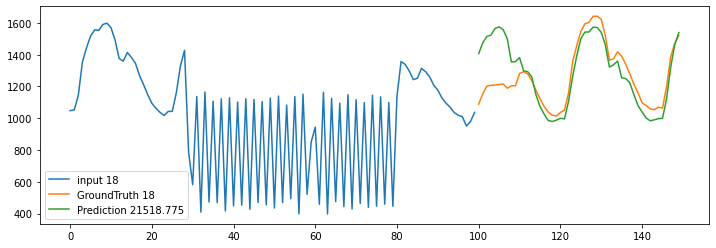

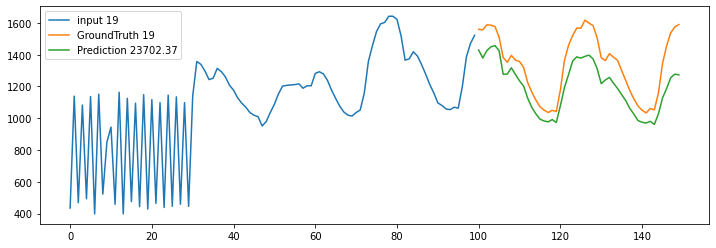

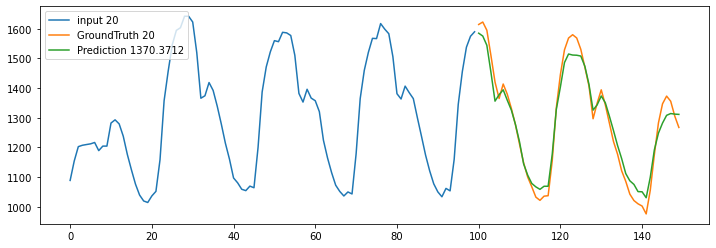

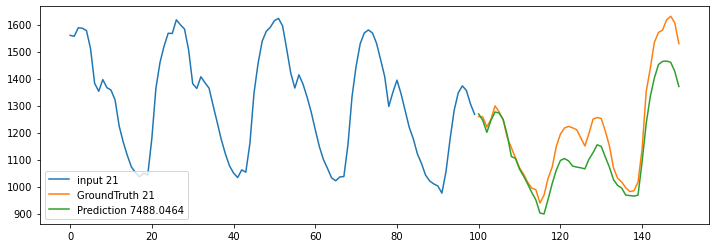

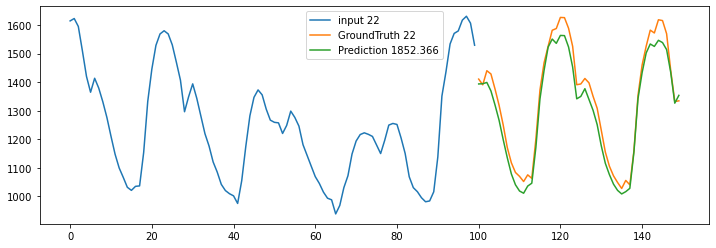

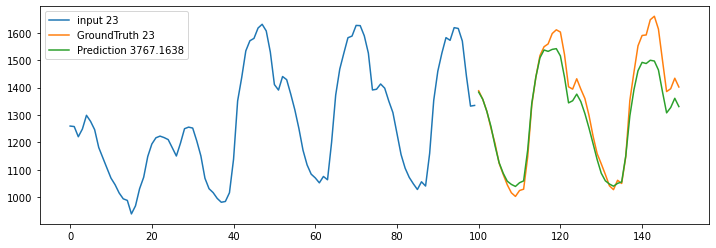

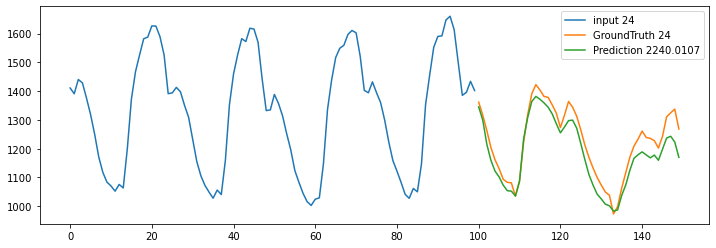

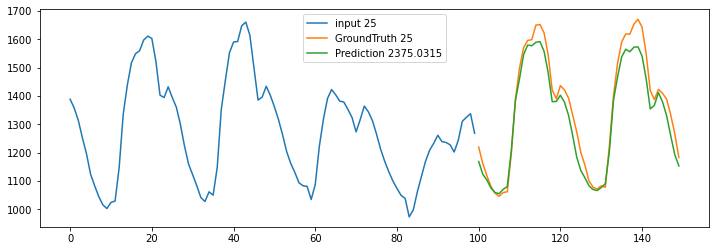

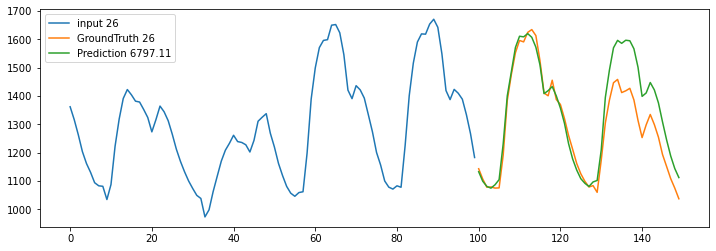

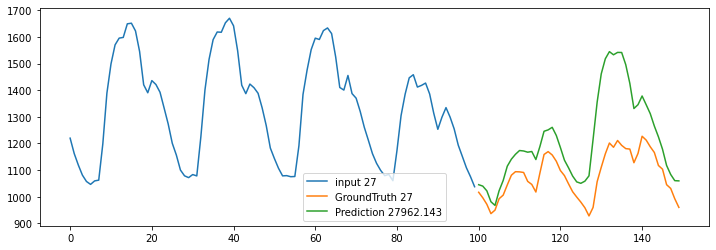

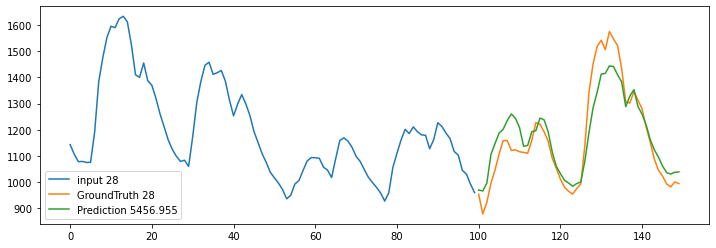

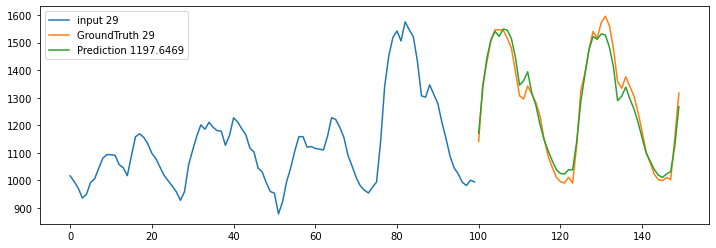

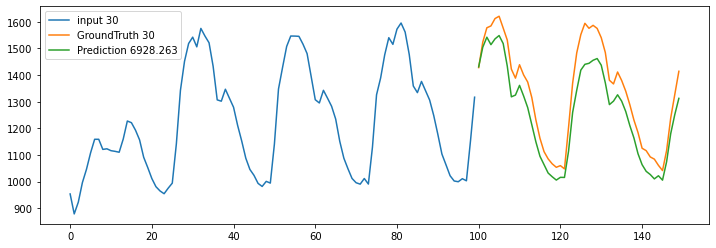

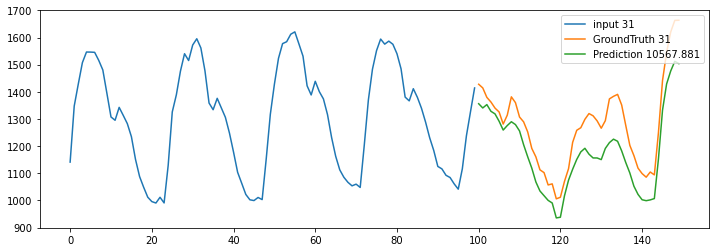

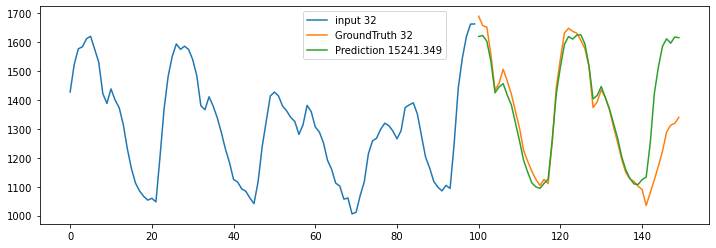

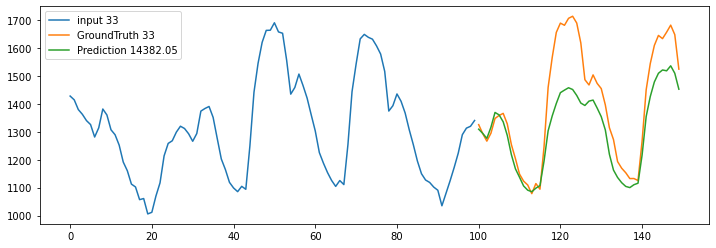

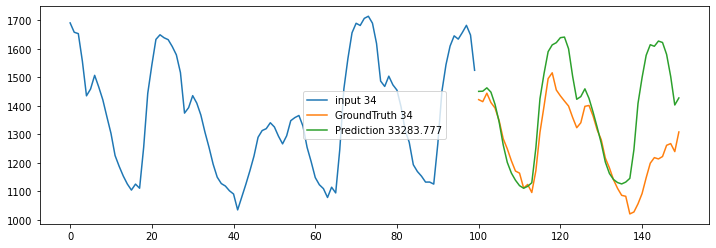

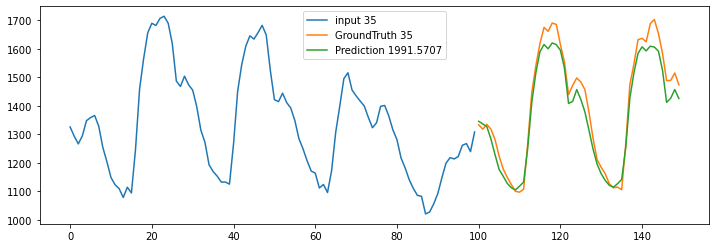

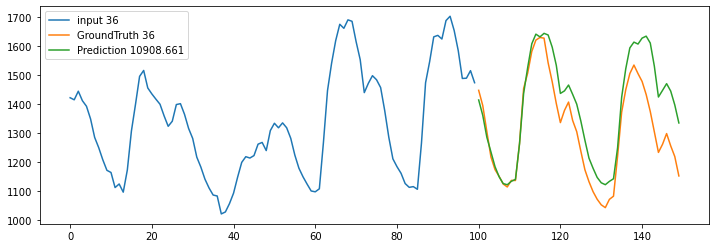

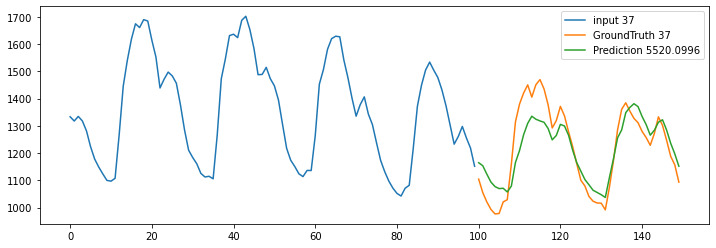

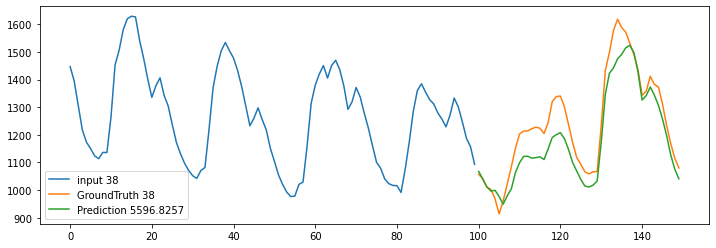

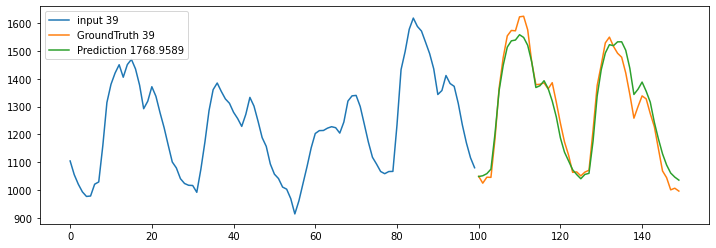

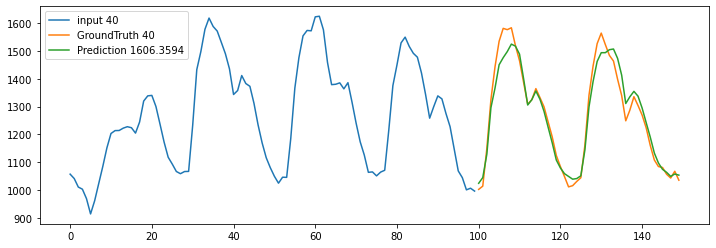

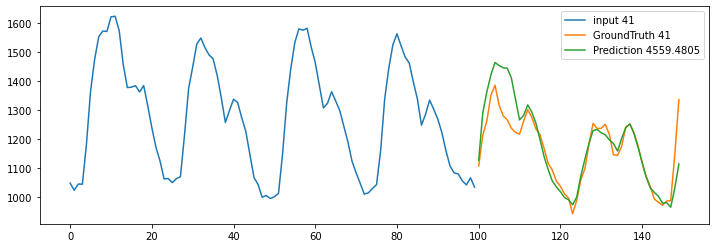

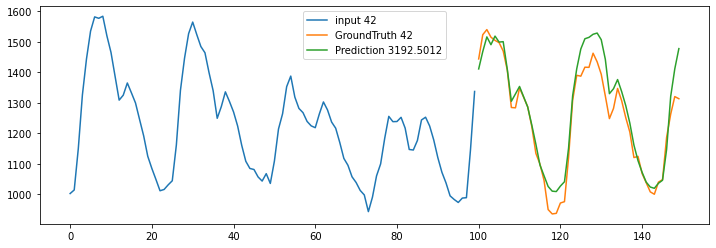

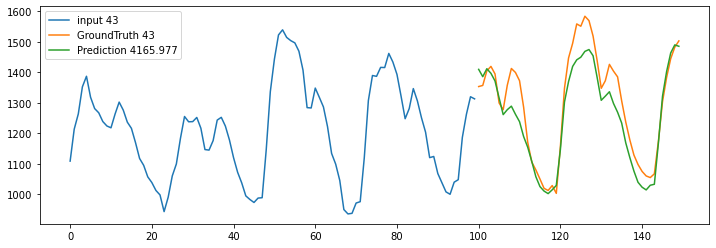

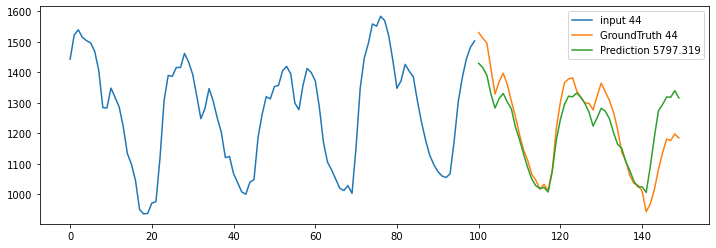

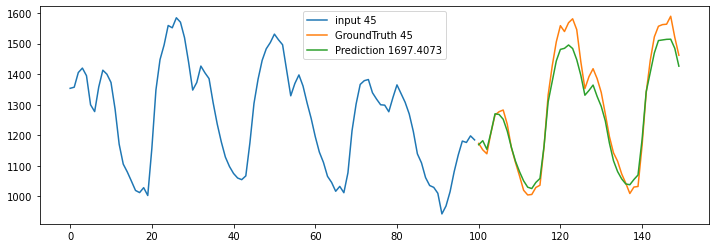

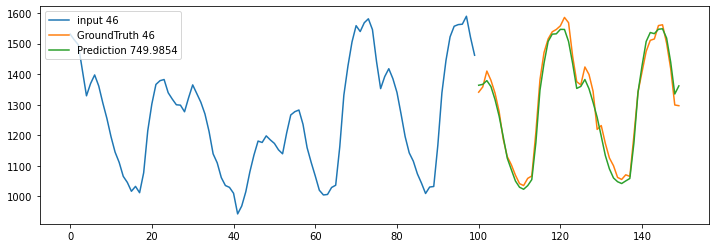

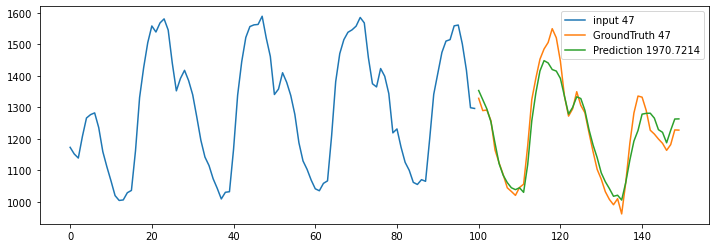

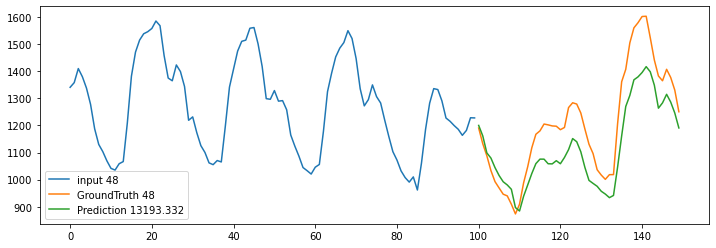

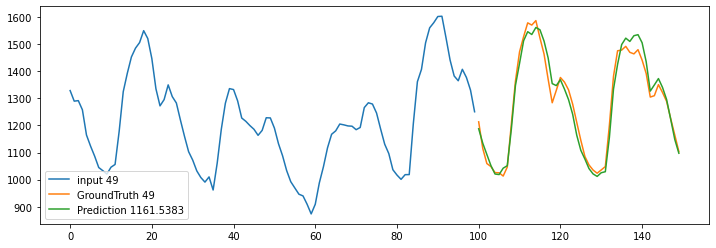

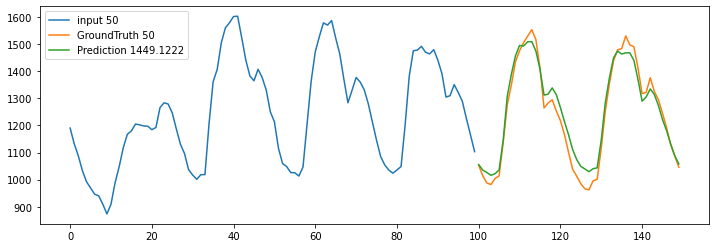

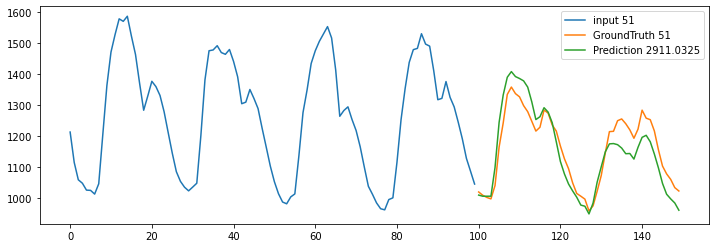

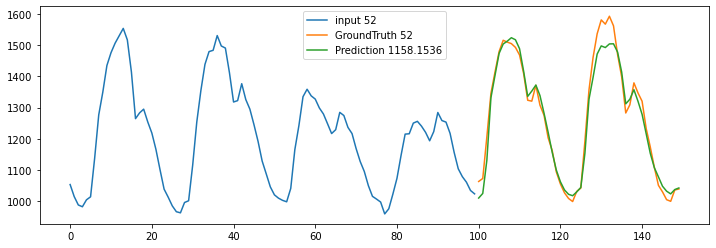

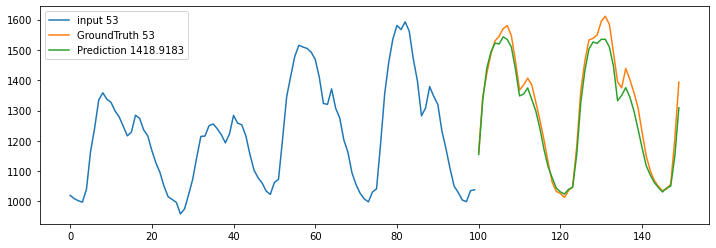

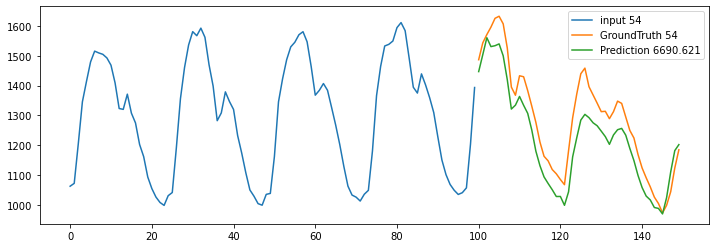

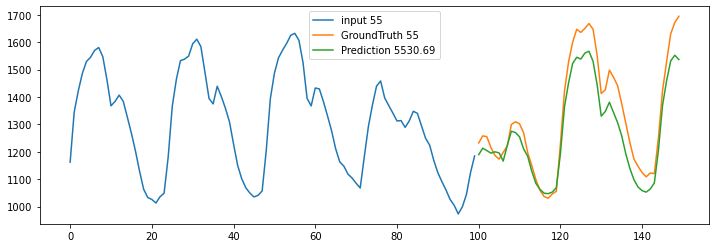

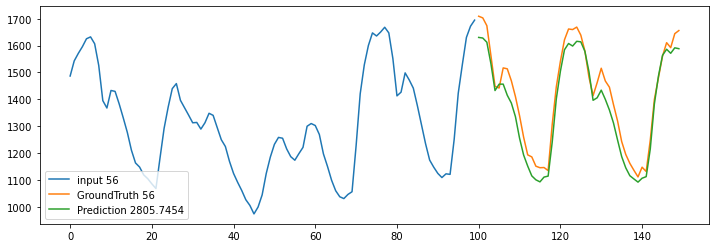

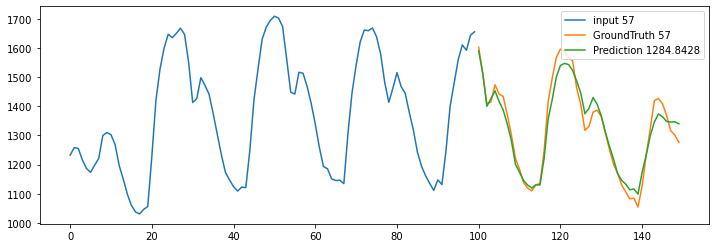

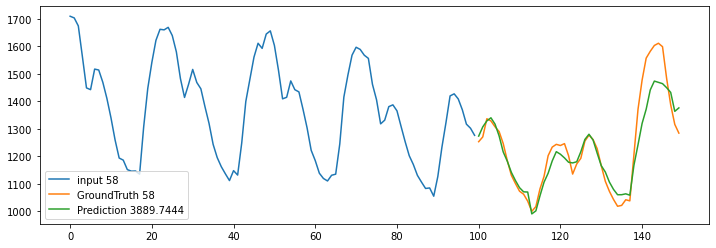

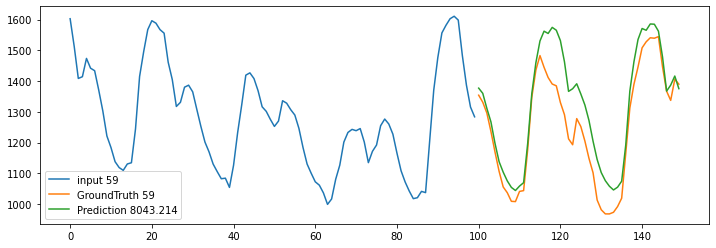

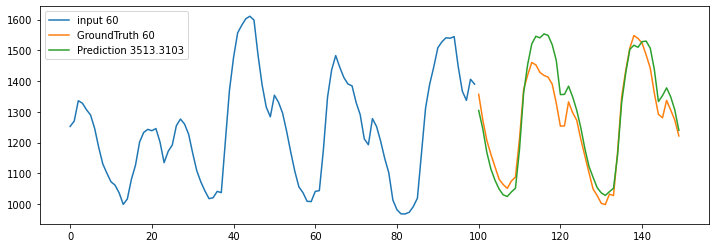

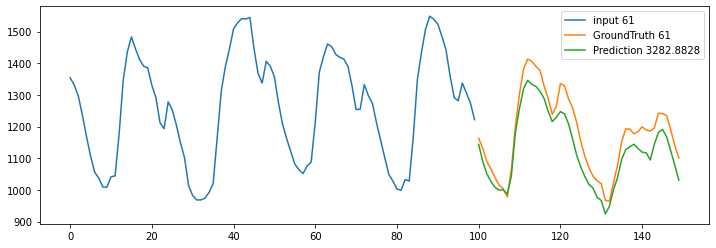

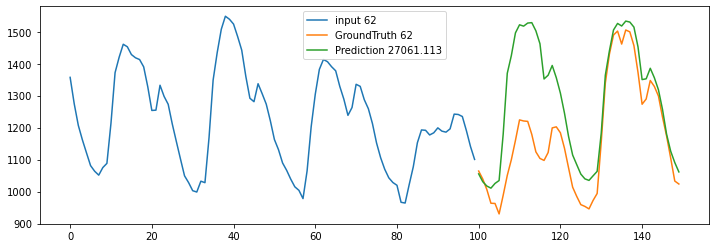

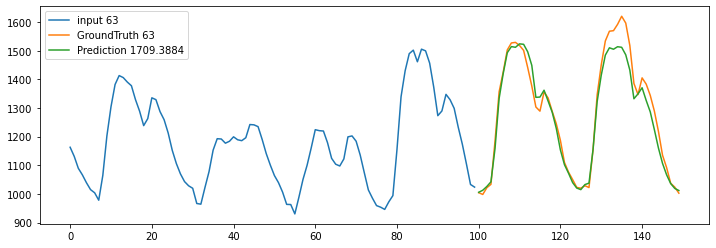

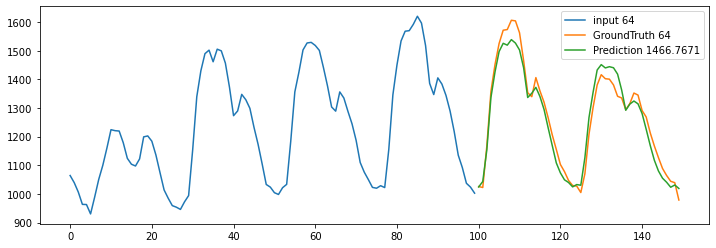

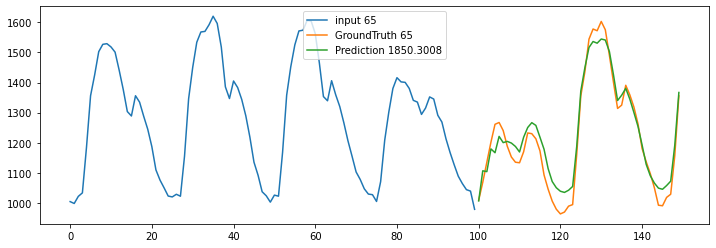

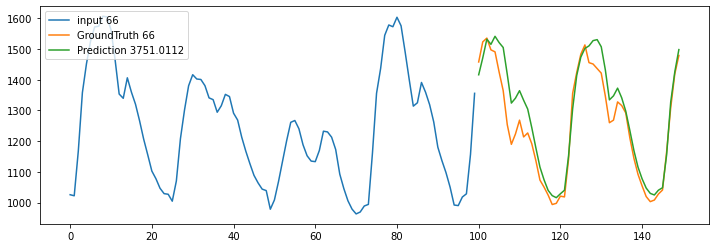

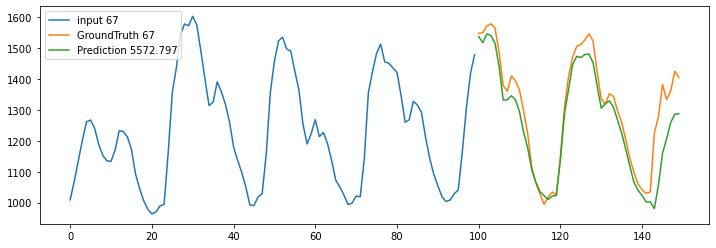

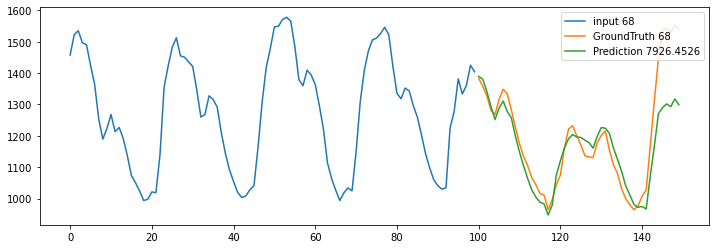

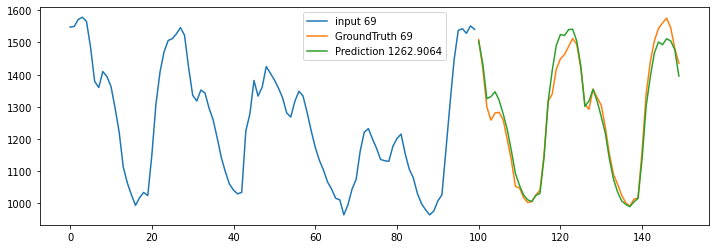

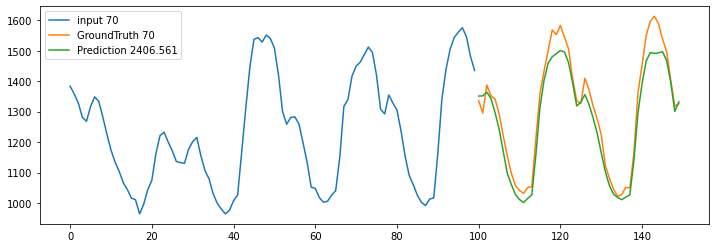

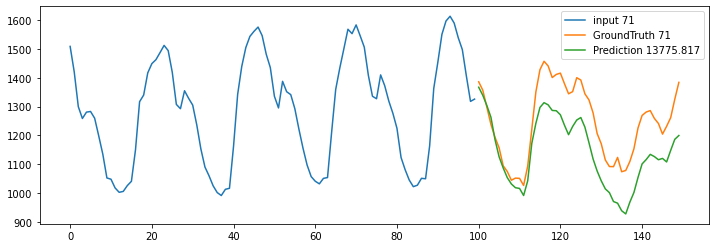

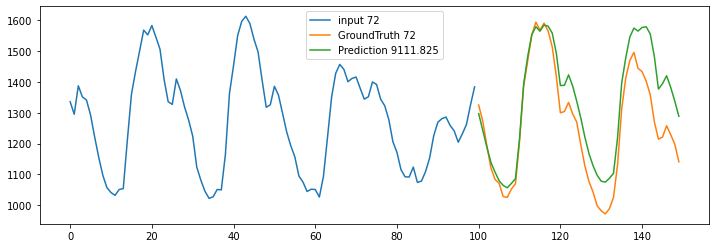

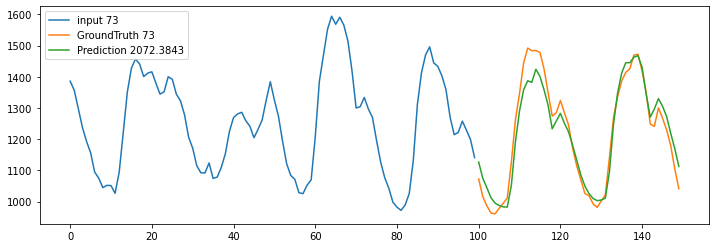

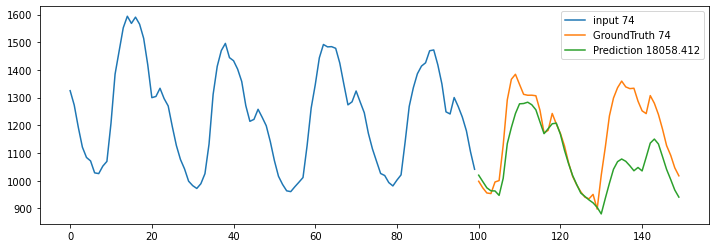

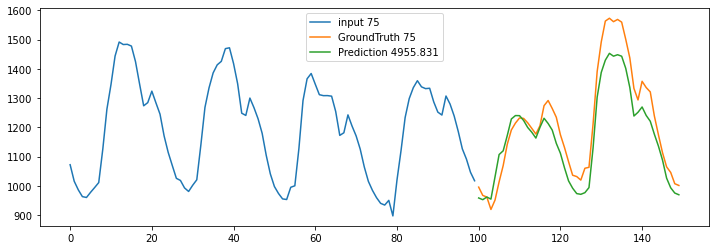

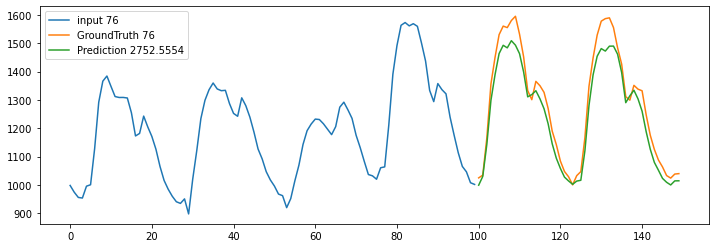

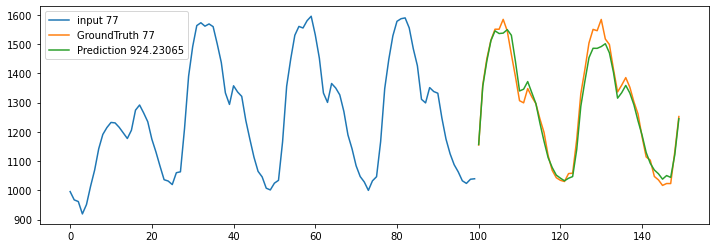

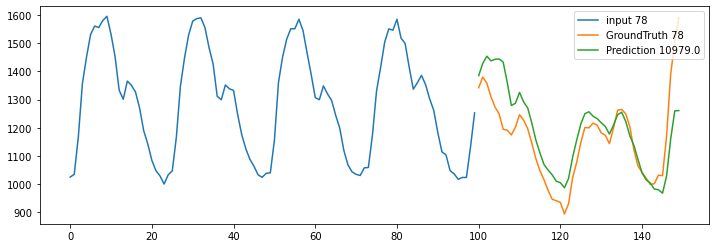

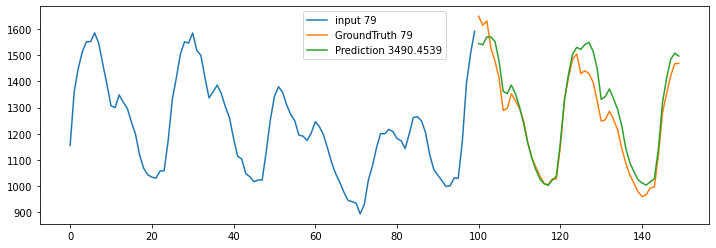

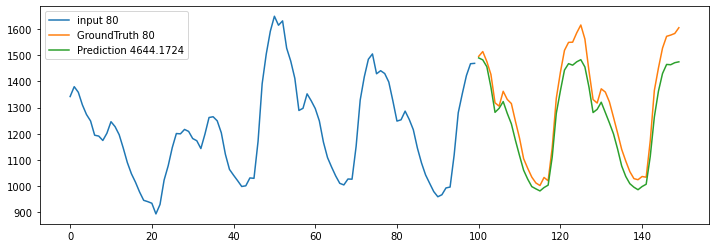

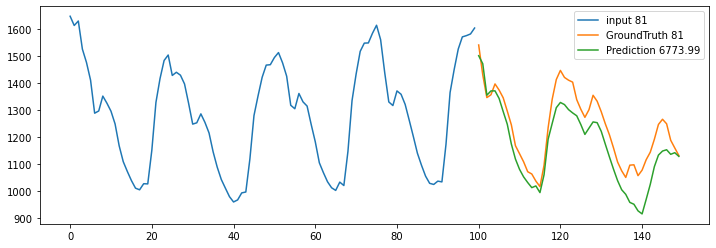

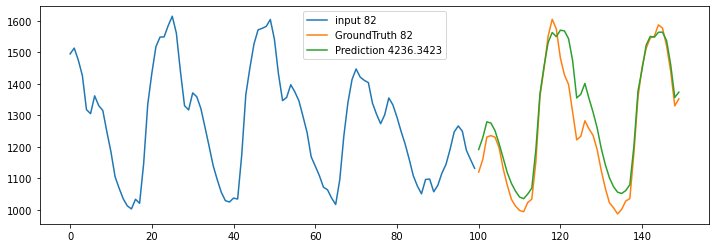

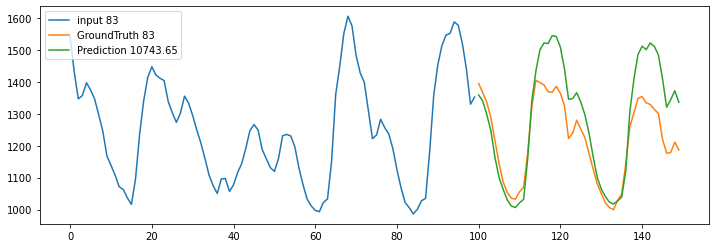

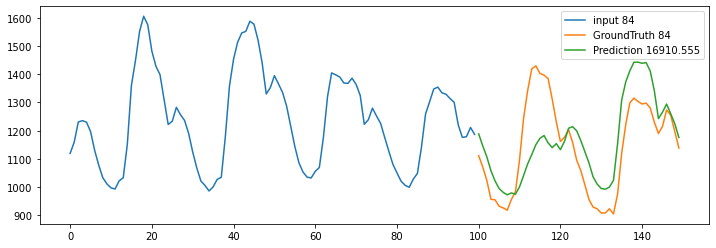

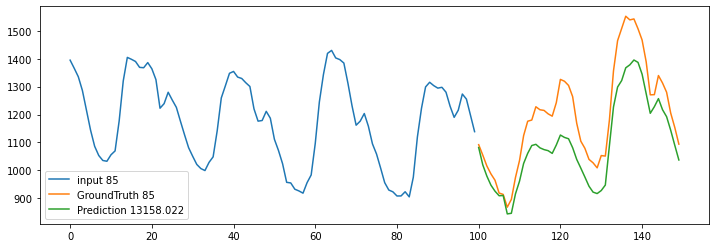

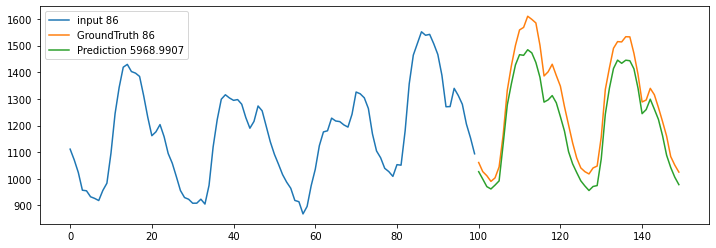

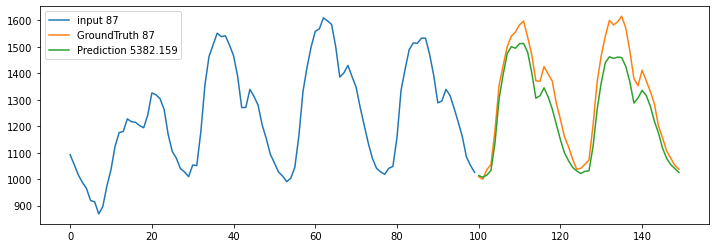

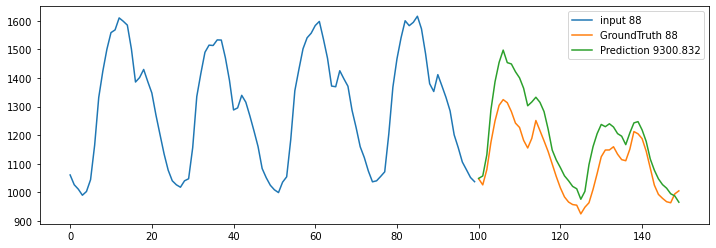

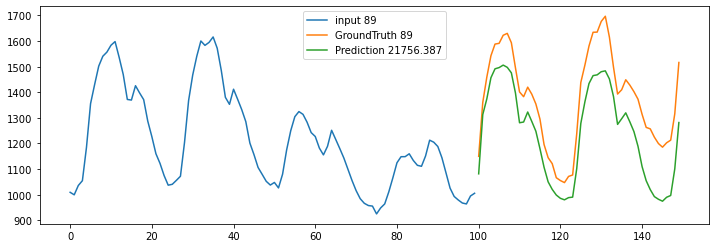

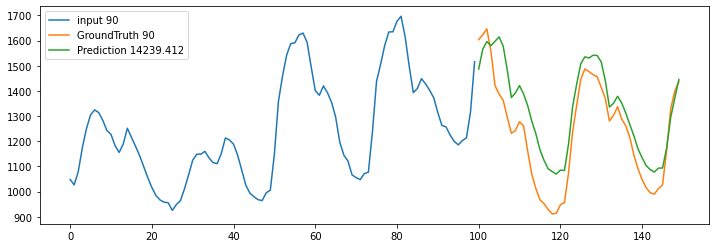

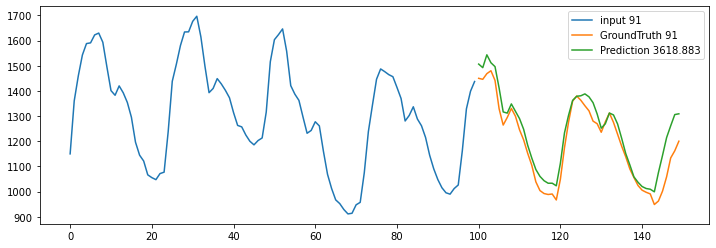

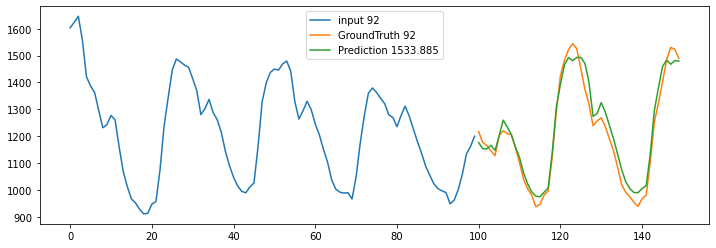

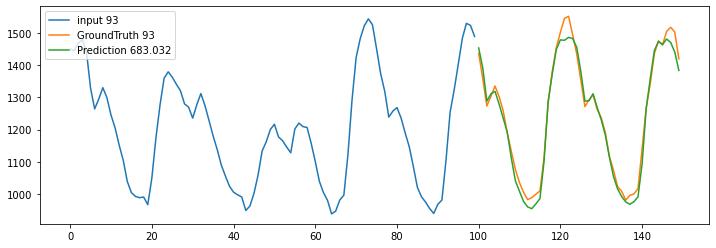

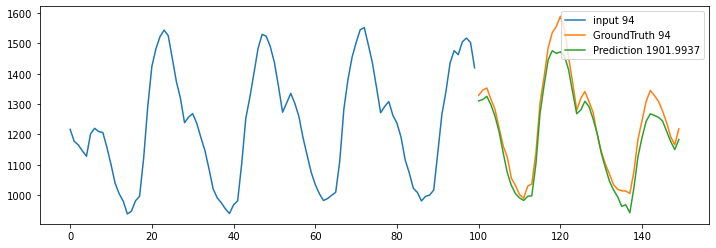

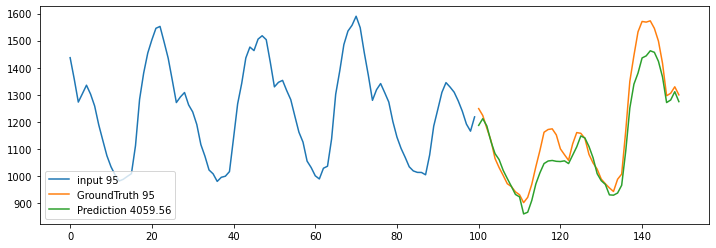

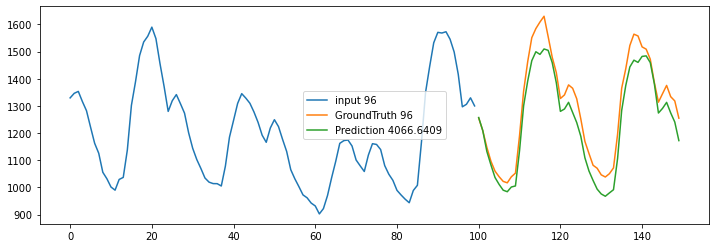

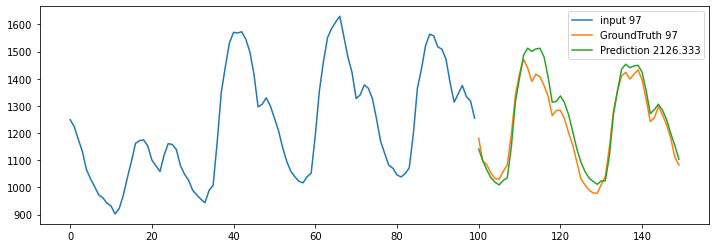

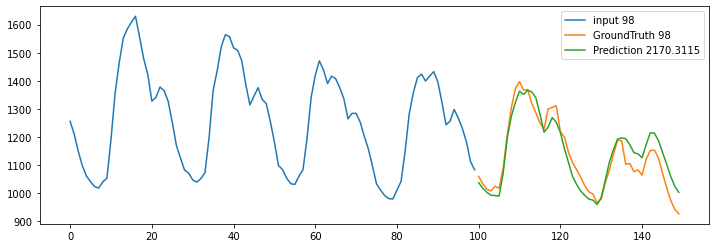

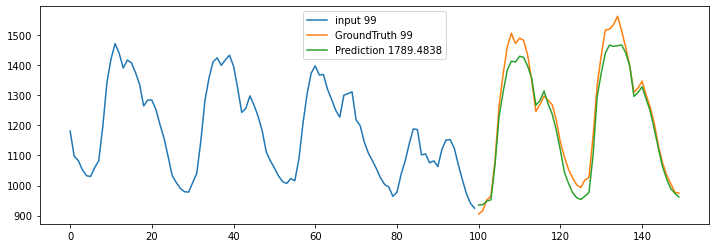

In [21]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]

for i in range(100):
    plt.figure()
    c =i 
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(preds[c,:,0],trues[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()

In [45]:
!python mask_generator.py --dataset_name electricity

File saved as /mnt/cat/data/sandy/Forecasting/data/electricity_mask_iqr.npy !!


In [4]:
# import numpy as np
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import iqr
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# path = "Results/electricity_train/electricity_ip_100_op_25_test_02/electricity/"
# preds = np.load(path+'trans-mse-ar_pred_mu.npy')
# inputs = np.load(path+'inputs.npy')
# trues = np.load(path+'targets.npy')
# new_preds = preds.squeeze()
# new_trues = trues.squeeze()
# N_input = 336
# print(new_preds.shape,new_trues.shape)
# n = (N_input-1)//50 + 1
# l = new_preds.shape[0]
# final = []
# for line in range(0,l,n-1):
#     chunk = dict()
#     chunk['preds'] = new_preds[line:line+n]
#     chunk['trues'] = new_trues[line:line+n]
#     chunk['mask'] = np.zeros_like(new_trues[line:line+n])
#     chunk['mse'] = [mean_squared_error(i,j) for i,j in zip(new_preds[line:line+n],new_trues[line:line+n])]
#     final.append(chunk)
# mse = [mean_squared_error(i,j) for i,j in zip(new_preds,new_trues)]








# for j,line in enumerate(final):
#     # print(sorted(line['mse'],reverse=True))
#     msep = np.quantile(mse,0.75)+iqr(mse,interpolation='midpoint')*1.5
#     if np.max(line['mse'])>msep:
#         print(np.argsort(line['mse'])[-1],line['mse']>msep,max(line['mse']))
#         for x in range(1,3):
#             i = np.argsort(line['mse'])[-x]
#             if line['mse'][i]>msep:
#                 final[j]['mask'][i]= 1
# mask = final[0]['mask'].flatten()
# for line in final[1:]:
#     mask=np.hstack((mask,line['mask'][1:].flatten()))
# np.save("mask_energy_100_op_25_test_02.npy",mask)

(378, 25) (378, 25)
5 [False False False False False  True False] 30417.936
1 [False  True False False False False False] 204501.31
4 [False False False False  True  True  True] 355808.75
0 [ True  True  True False False False False] 101521.89
6 [False False False False False False  True] 15736.537
2 [ True False  True False False False False] 17903.668
6 [False False False False False False  True] 39945.0
0 [ True False False  True False False False] 39945.0
5 [False False False False False  True False] 12403.887
5 [False False  True False False  True  True] 60352.453
0 [ True False False False False False False] 48403.05
6 [False False False False False False  True] 15116.836
0 [ True False False False False False False] 15116.836
1 [False  True False False False False False] 16317.9
1 [False  True False False False False False] 30983.652
5 [False False False False False  True False] 16243.54
2 [False False  True  True False False False] 25709.02
6 [False False False False False Fals

In [5]:
line['mse']

[454.2183, 1465.5262, 5862.1025, 3038.1362, 1613.6603, 4404.3516]

In [6]:
# # create a scaler object
# std_scaler = StandardScaler()
# mse = np.array(mse).reshape(-1,1)
# # fit and transform the data
# mse = std_scaler.fit_transform(mse)
print(np.quantile(mse,0.75)+iqr(mse,interpolation='midpoint')*1.5)
print(np.quantile(mse,0.9))

11904.53726196289
14829.202539062504


In [7]:
# print(len(mask))



In [8]:
mask1 = np.load("mask_energy_100_op_25_test_02.npy")
mask2 = np.load("mask_energy_100_op_50_test_01.npy")
m = trues.reshape(-1,)
print(mask1.shape,mask2.shape,m.shape)
# print(sum(mask)/len(mask))
data_mask = mask1[25:-25]*mask2
np.save("/mnt/cat/data/sandy/Forecasting/data/energy-anomaly-detection/energy_mask_100_50.npy",data_mask)

(9450,) (9400,) (9450,)


In [19]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(y = mask1[25:-25]*500,name='mask25'))

fig.add_trace(
    go.Scatter(y = mask2*600,name='mask100'))

fig.add_trace(
    go.Scatter(y= m[25:-25],name='input'))

fig.show()
